<h1 style="text-align:center">Two Mass-Spring-Damper <br> Modal Damping Approximation</h1>
<h3 style="text-align:center">MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/TwoMass_3spring_Damped.png" alt="A Two-Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Two-Mass-Spring-Damper System</strong>
</p>

This notebook demonstrates investigates the modal damping of a two-mass-spring-damper system shown in Figure 1. We'll first simluate the "full" system, then simluate the decoupled equations of motion generated using an approximation to allow the decoupling. For light damping, we'll see that this approximation works reasonably well.

We'll just look at one example set of parameters. The same techniques apply for other parameters and for larger matrices. 

The equations of motion for the system are:

$ \quad m_1 \ddot{x}_1 + (c_1+c_2)\dot{x}_1 - c_2\dot{x}_2 + (k_1+k_2)x_1 - k_2 x_2 = 0 $

$ \quad m_2 \ddot{x}_2 - c_2\dot{x}_1 + (c_2 + c_3)\dot{x}_2 - k_2 x_1 + (k_2 + k_3)x_2 = 0 $

We could also write these equations in matrix form:

$ \quad \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix}\begin{bmatrix}\ddot{x}_1 \\ \ddot{x}_2\end{bmatrix} + \begin{bmatrix}c_1 + c_2 & -c_2 \\ -c_2 & c_2 + c_3\end{bmatrix}\begin{bmatrix}\dot{x}_1 \\ \dot{x}_2\end{bmatrix} + \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3\end{bmatrix}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} = \begin{bmatrix}0 \\ 0\end{bmatrix}$

Define

$ \quad M = \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix} $

$ \quad C = \begin{bmatrix}c_1 + c_2 & -c_2 \\ -c_2 & c_2 + c_3\end{bmatrix} $

and 

$ \quad K = \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3\end{bmatrix} $

For information on how to obtain these equations, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll use the [Scipy version of the linear algebra module](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.linalg.eigh.html). It allows us to solve the "general" eignevalue problem.

In [1]:
import numpy as np                        # Grab all of the NumPy functions with nickname np

from scipy.integrate import odeint        # We also need to import odeint for the simluations
from scipy import linalg                  # We'll use linalg for the eigenvalue problems

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

import matplotlib.pyplot as plt

In [3]:
# Define the system as a series of 1st order ODEs (beginnings of state-space form)
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1, x1_dot, x2, x2_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m1, m2, k1, k2, k3, c1, c2, c3]
    """
    x1, x1_dot, x2, x2_dot = w
    m1, m2, k1, k2, k3, c1, c2, c3 = p

    # Create sysODE = (x1', x1_dot', x2', x2_dot'):
    sysODE = [x1_dot,
             (-(k1 + k2) * x1 - (c1 + c2) * x1_dot + k2 * x2 + c2 * x2_dot) / m1,
             x2_dot,
             (k2 * x1 + c2 * x1_dot - (k2 + k3) * x2 - (c2 + c3) * x2_dot) / m2]
              
    return sysODE

In [4]:
# Define the system parameters
m1 = 1.0                # kg
m2 = 2.0                # kg
k1 = 100.0              # N/m
k2 = 50.0               # N/m
k3 = 250.0              # N/m
c1 = 0.8                # Ns/m
c2 = 0.4                # Ns/m
c3 = 0.6                # Ns/m

In [5]:
# Set up simulation parameters 

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

In [6]:
# Now, set up the intial conditions and call the ODE solver

# Initial conditions
x1_init = 0.5                       # initial x1 position
x1_dot_init = 0.0                   # initial x1 velocity
x2_init = -0.5                      # initial x2 position
x2_dot_init = 0.0                   # initial x2 velocity

# Pack the parameters and initial conditions into arrays 
p = [m1, m2, k1, k2, k3, c1, c2, c3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

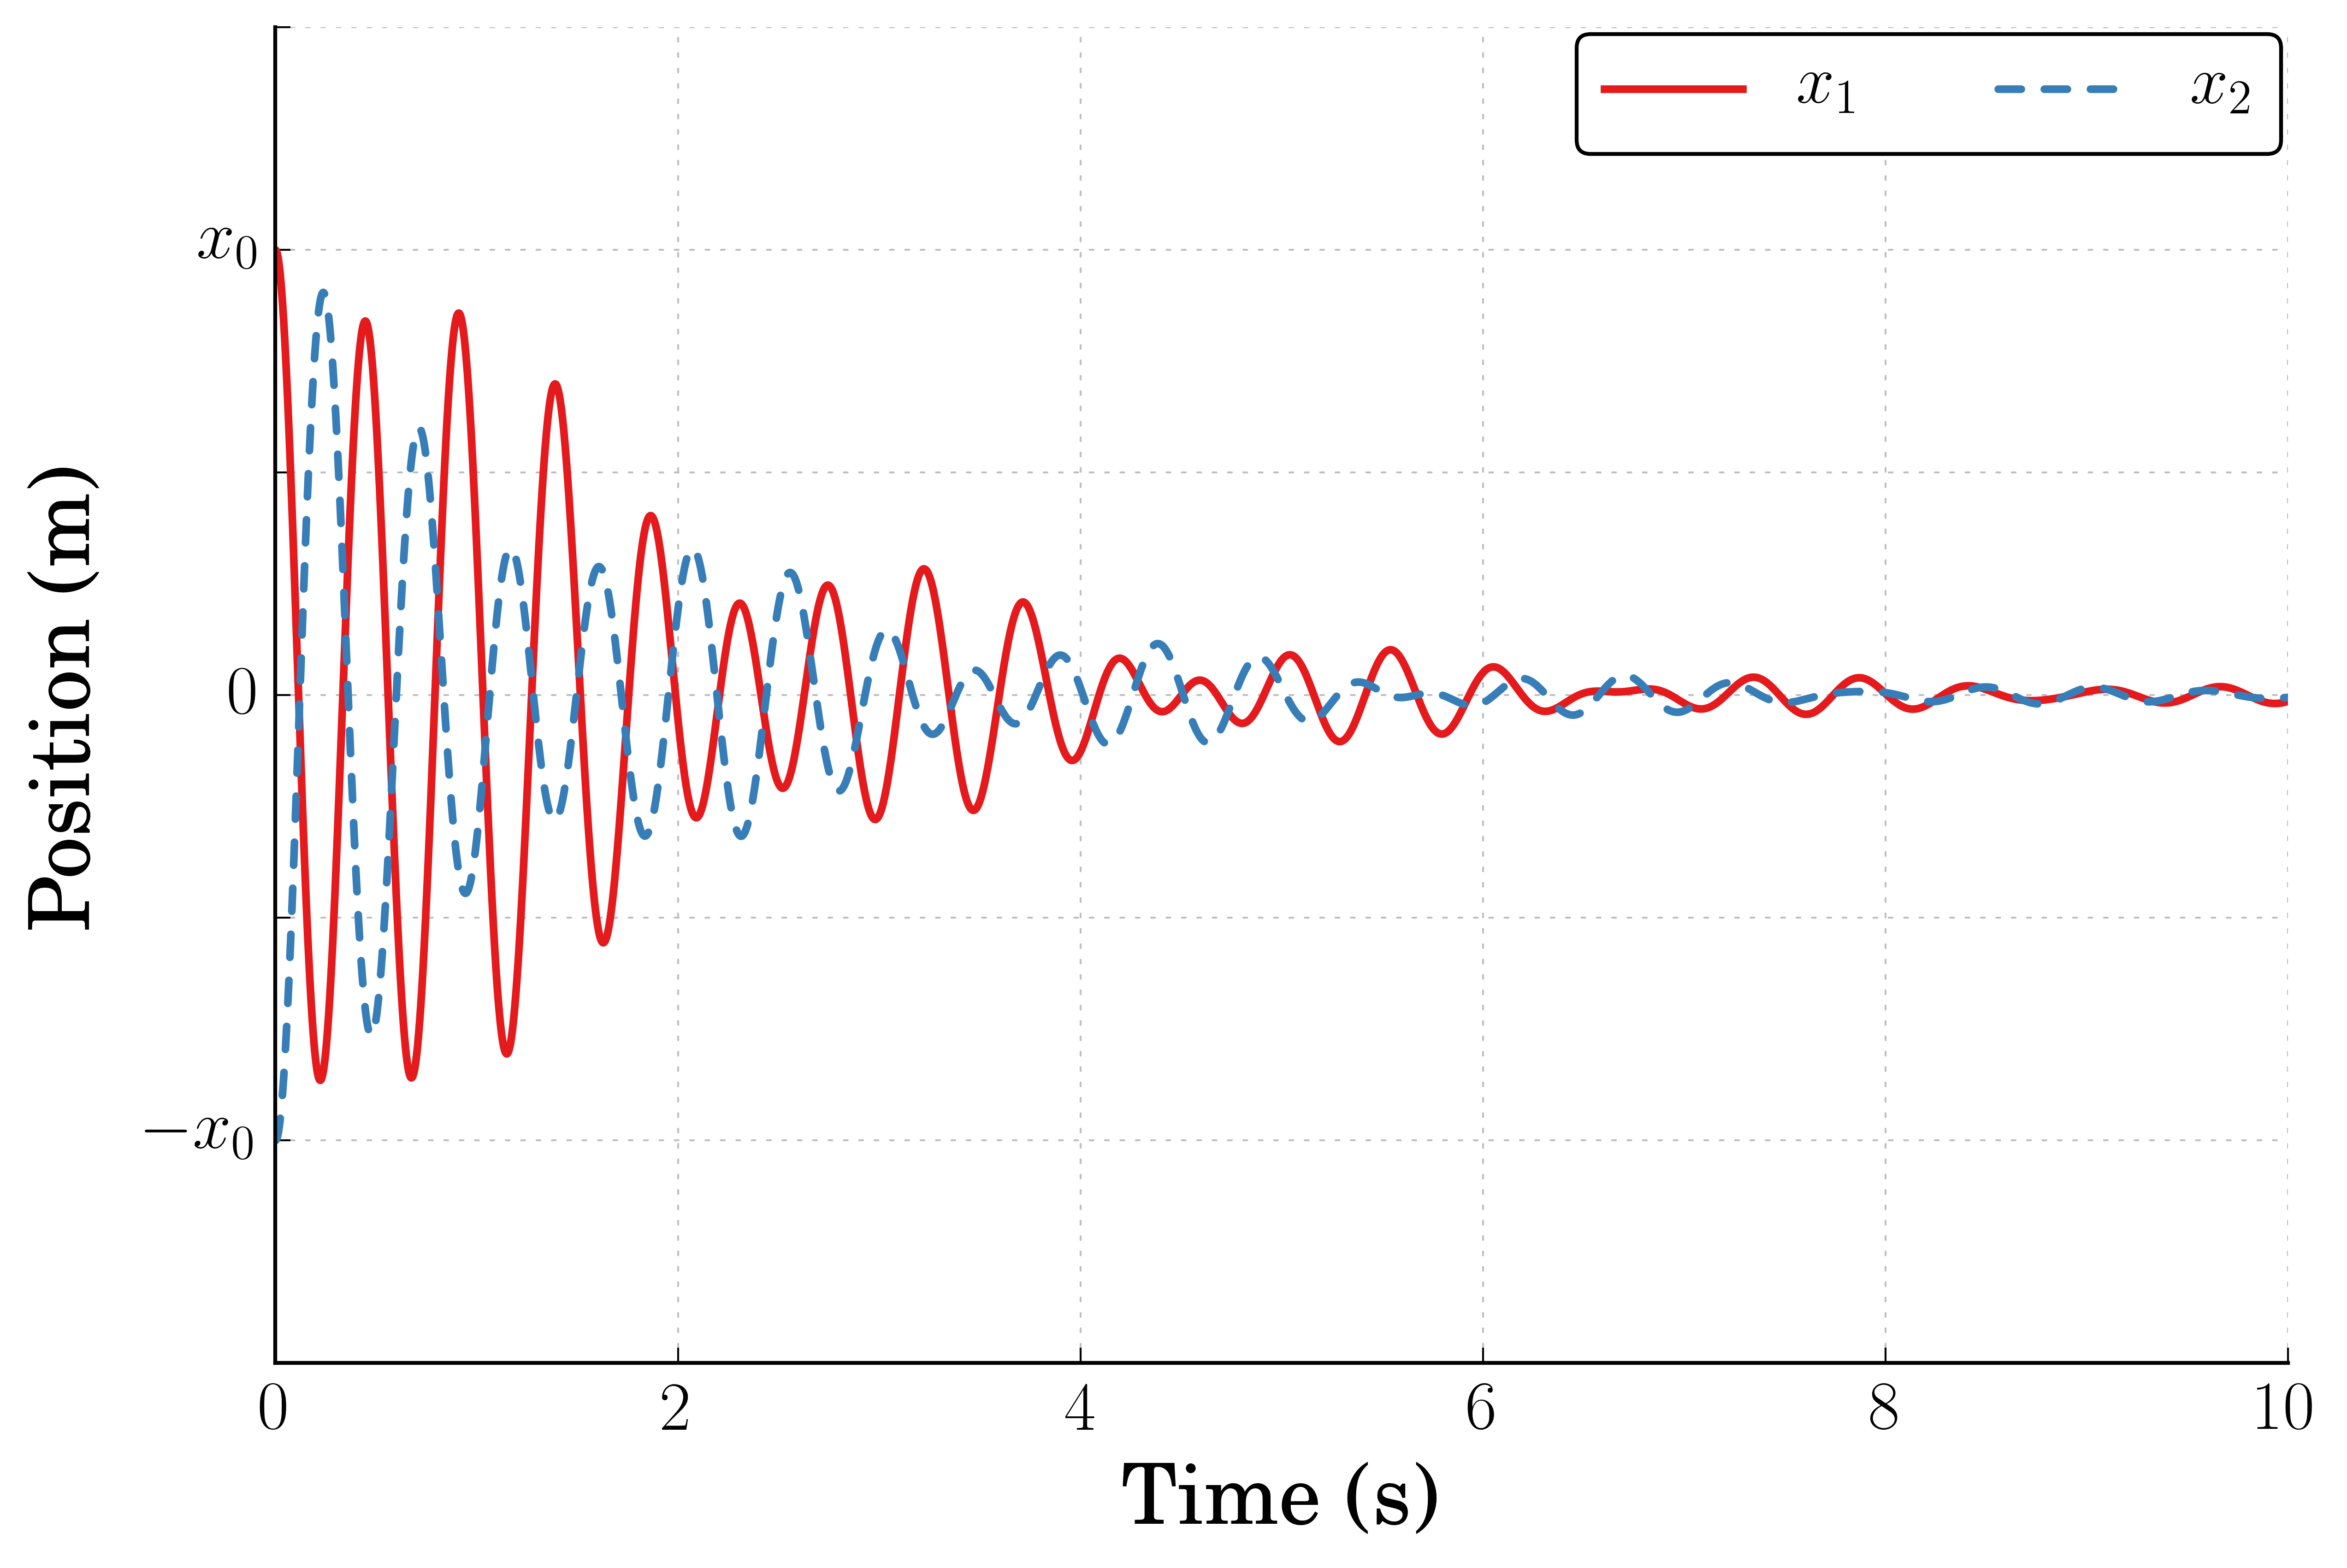

In [7]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-0.75,0.75)
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75], ['', '$-x_0$', '', '$0$', '', '$x_0$', ''])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_Midterm2_Prob1ci.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## The Undamped problem
Let's look first at an undamped version of this system ($c_1 = c_2 = c_3 = 0$).

For the undamped proble we can use $M$ and $K$ directly to solve:

$ \quad \left[K - \omega^2 M\right]\bar{X} = 0 $ 

for $\bar{X}$. This is an eigenvalue problem.


In [8]:
# Define the matrices
M = np.asarray([[m1, 0],
                [0,  m2]])

C = np.asarray([[c1 + c2, -c2],
                [-c2,      c2 + c3]])

K = np.asarray([[k1 + k2, -k2],
                [-k2,      k2 + k3]])

In [9]:
eigenvals, eigenvects = linalg.eigh(K, M)


The ```linalg.eigh``` function returns two arrays, one of the eigenvalues and one of the eigenvectors. The eigenvalues are the square of the two natural frequencies. The eigenvectors are returned in normalized form, with each 'column'' of the array representing an eigenvector.


In [10]:
print('\n')
print('The resulting eigenalues are {:.2f} and {:.2f}.'.format(eigenvals[0], eigenvals[1]))
print('\n')
print('So the two natrual frequencies are {:.2f}rad/s and {:.2f}rad/s.'.format(np.sqrt(eigenvals[0]), np.sqrt(eigenvals[1])))
print('\n')



The resulting eigenalues are 114.64 and 185.36.


So the two natrual frequencies are 10.71rad/s and 13.61rad/s.




In [11]:
print('\n')
print('The first eigenvector is ' + str(eigenvects[:,0]) + '.')
print('\n')
print('The second eigenvector is ' + str(eigenvects[:,1]) + '.')
print('\n')



The first eigenvector is [-0.70710678 -0.5       ].


The second eigenvector is [-0.70710678  0.5       ].




We can check that these eigenvectors diagaonalize the mass and stiffness matrices, then see what happens to the damping matrix under the same transformation. The matrix returned by ```linalg.eigh``` already has the form of the $U$ matrix we use to make the decoupling transformation. So, we just need to write:

$ \quad M' = U^T M U $

$ \quad K' = U^T K U $

and

$ \quad C' = U^T C U $

In [12]:
# The @ operator is new in Python 3 and represents matrix multiplication
M_prime = eigenvects.T @ M @ eigenvects 
K_prime = eigenvects.T @ K @ eigenvects
C_prime = eigenvects.T @ C @ eigenvects

Let's make the output prettier before printing the results. We'll use the ```numpy.set_printoptions``` method. See [the help page](http://docs.scipy.org/doc/numpy/reference/generated/numpy.set_printoptions.html) for more info.

In [13]:
np.set_printoptions(suppress=True, precision=4)

In [14]:
print('The M\' matrix is: \n\n{}'.format(M_prime))

print('\n\nThe K\' martrix is \n\n{}'.format(K_prime))

print('\n\nThe C\' martrix is \n\n{}'.format(C_prime))

The M' matrix is: 

[[ 1.  0.]
 [ 0.  1.]]


The K' martrix is 

[[ 114.6447    0.    ]
 [   0.      185.3553]]


The C' martrix is 

[[ 0.5672  0.35  ]
 [ 0.35    1.1328]]


Notice that the $M'$ matrix is identity, as it should be, and $K'$ is a diagonal matrix with the eigenvalues on the diagonal, as it should be. The $C'$ matrix, however, has not been decoupled using this transformation.

Let's look at what happens if we ignore the terms that remain coupled. The result is set of equations representing the two modes of the system:

$ \quad M' \ddot{H} + \tilde{C}' \dot{H} + K' H = 0 $

where 

$ \quad \tilde{C}' = \begin{bmatrix}0.5672 & 0 \\ 0 & 1.1328\end{bmatrix} $

If we do this, then the result is two uncoupled equations of motion:

$ \quad \ddot{\eta}_1 + 2 \zeta_1 \omega_1 \dot{\eta}_1 + \omega_1^2 \eta_1= 0 $

$ \quad \ddot{\eta}_2 + 2 \zeta_2 \omega_2 \dot{\eta}_2 + \omega_2^2 \eta_2= 0 $

where $\omega_i$ and $\zeta_i$ are the the $i^{th}$ mode's natural frequency and approximately modal damping ratio, respectively.

We can now simluate this system decoupled by ignoring the off-diagonal terms in the $C'$ matrix and compare it to the full equation, whose response we plotted above. We'll write the system as a set of first-order different equations, then simluate and plot the response to the same initial conditions we plotted above.

In [15]:
def modal_eq_of_motion(w, t, p):
    """
    Defines the differential equations for the decoupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [h1, h1_dot, h2, h2_dot]
        t :  time
        p :  vector of the parameters:
                  p = [omega1, omega2, zeta1, zeta2]
    """
    
    h1, h1_dot, h2, h2_dot = w
    omega1, omega2, zeta1, zeta2 = p
    
    sys_ODE = [h1_dot,
               -2 * zeta1 * omega1 * h1_dot - omega1**2 * h1,
               h2_dot,
               -2 * zeta2 * omega2 * h2_dot - omega2**2 * h2]
    
    return sys_ODE

In [16]:
# Now, set up the intial conditions and call the ODE solver

# Translate the intial conditions of x1 and x2 into intiial conditions in the modal coordinates
H_init = np.linalg.inv(eigenvects) @ [x1_init, x2_init]
H_dot_init = np.linalg.inv(eigenvects) @ [x1_dot_init, x2_dot_init]

# Initial conditions
h1_init = H_init[0]                 # initial h1 position
h1_dot_init = H_dot_init[0]         # initial h1 velocity
h2_init = H_init[1]                 # initial h2 position
h2_dot_init = H_dot_init[0]         # initial h2 velocity


omega1 = np.sqrt(eigenvals[0])
omega2 = np.sqrt(eigenvals[1])
zeta1 = C_prime[0,0] / (2 * omega1)
zeta2 = C_prime[1,1] / (2 * omega2)

# Pack the parameters and initial conditions into arrays 
p = [omega1, omega2, zeta1, zeta2]
x0 = [h1_init, h1_dot_init, h2_init, h2_dot_init]

# Call the ODE solver.
modal_resp = odeint(modal_eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

Now, we need to relate this modal reponse back to motion in $x_1$ and $x_2$ to allow us to compare it to the full, coupled simluation. To do this, remember that:

$ \quad X = U H $

so, 

$ \quad x_1 = U_{11} \eta_1 + U_{12} \eta_2 $ 

and 

$ \quad x_2 = U_{21} \eta_1 + U_{22} \eta_2 $ 

In [17]:
x1_decoupled = eigenvects[0,0] * modal_resp[:,0] + eigenvects[0,1] * modal_resp[:,2]
x2_decoupled = eigenvects[1,0] * modal_resp[:,0] + eigenvects[1,1] * modal_resp[:,2]

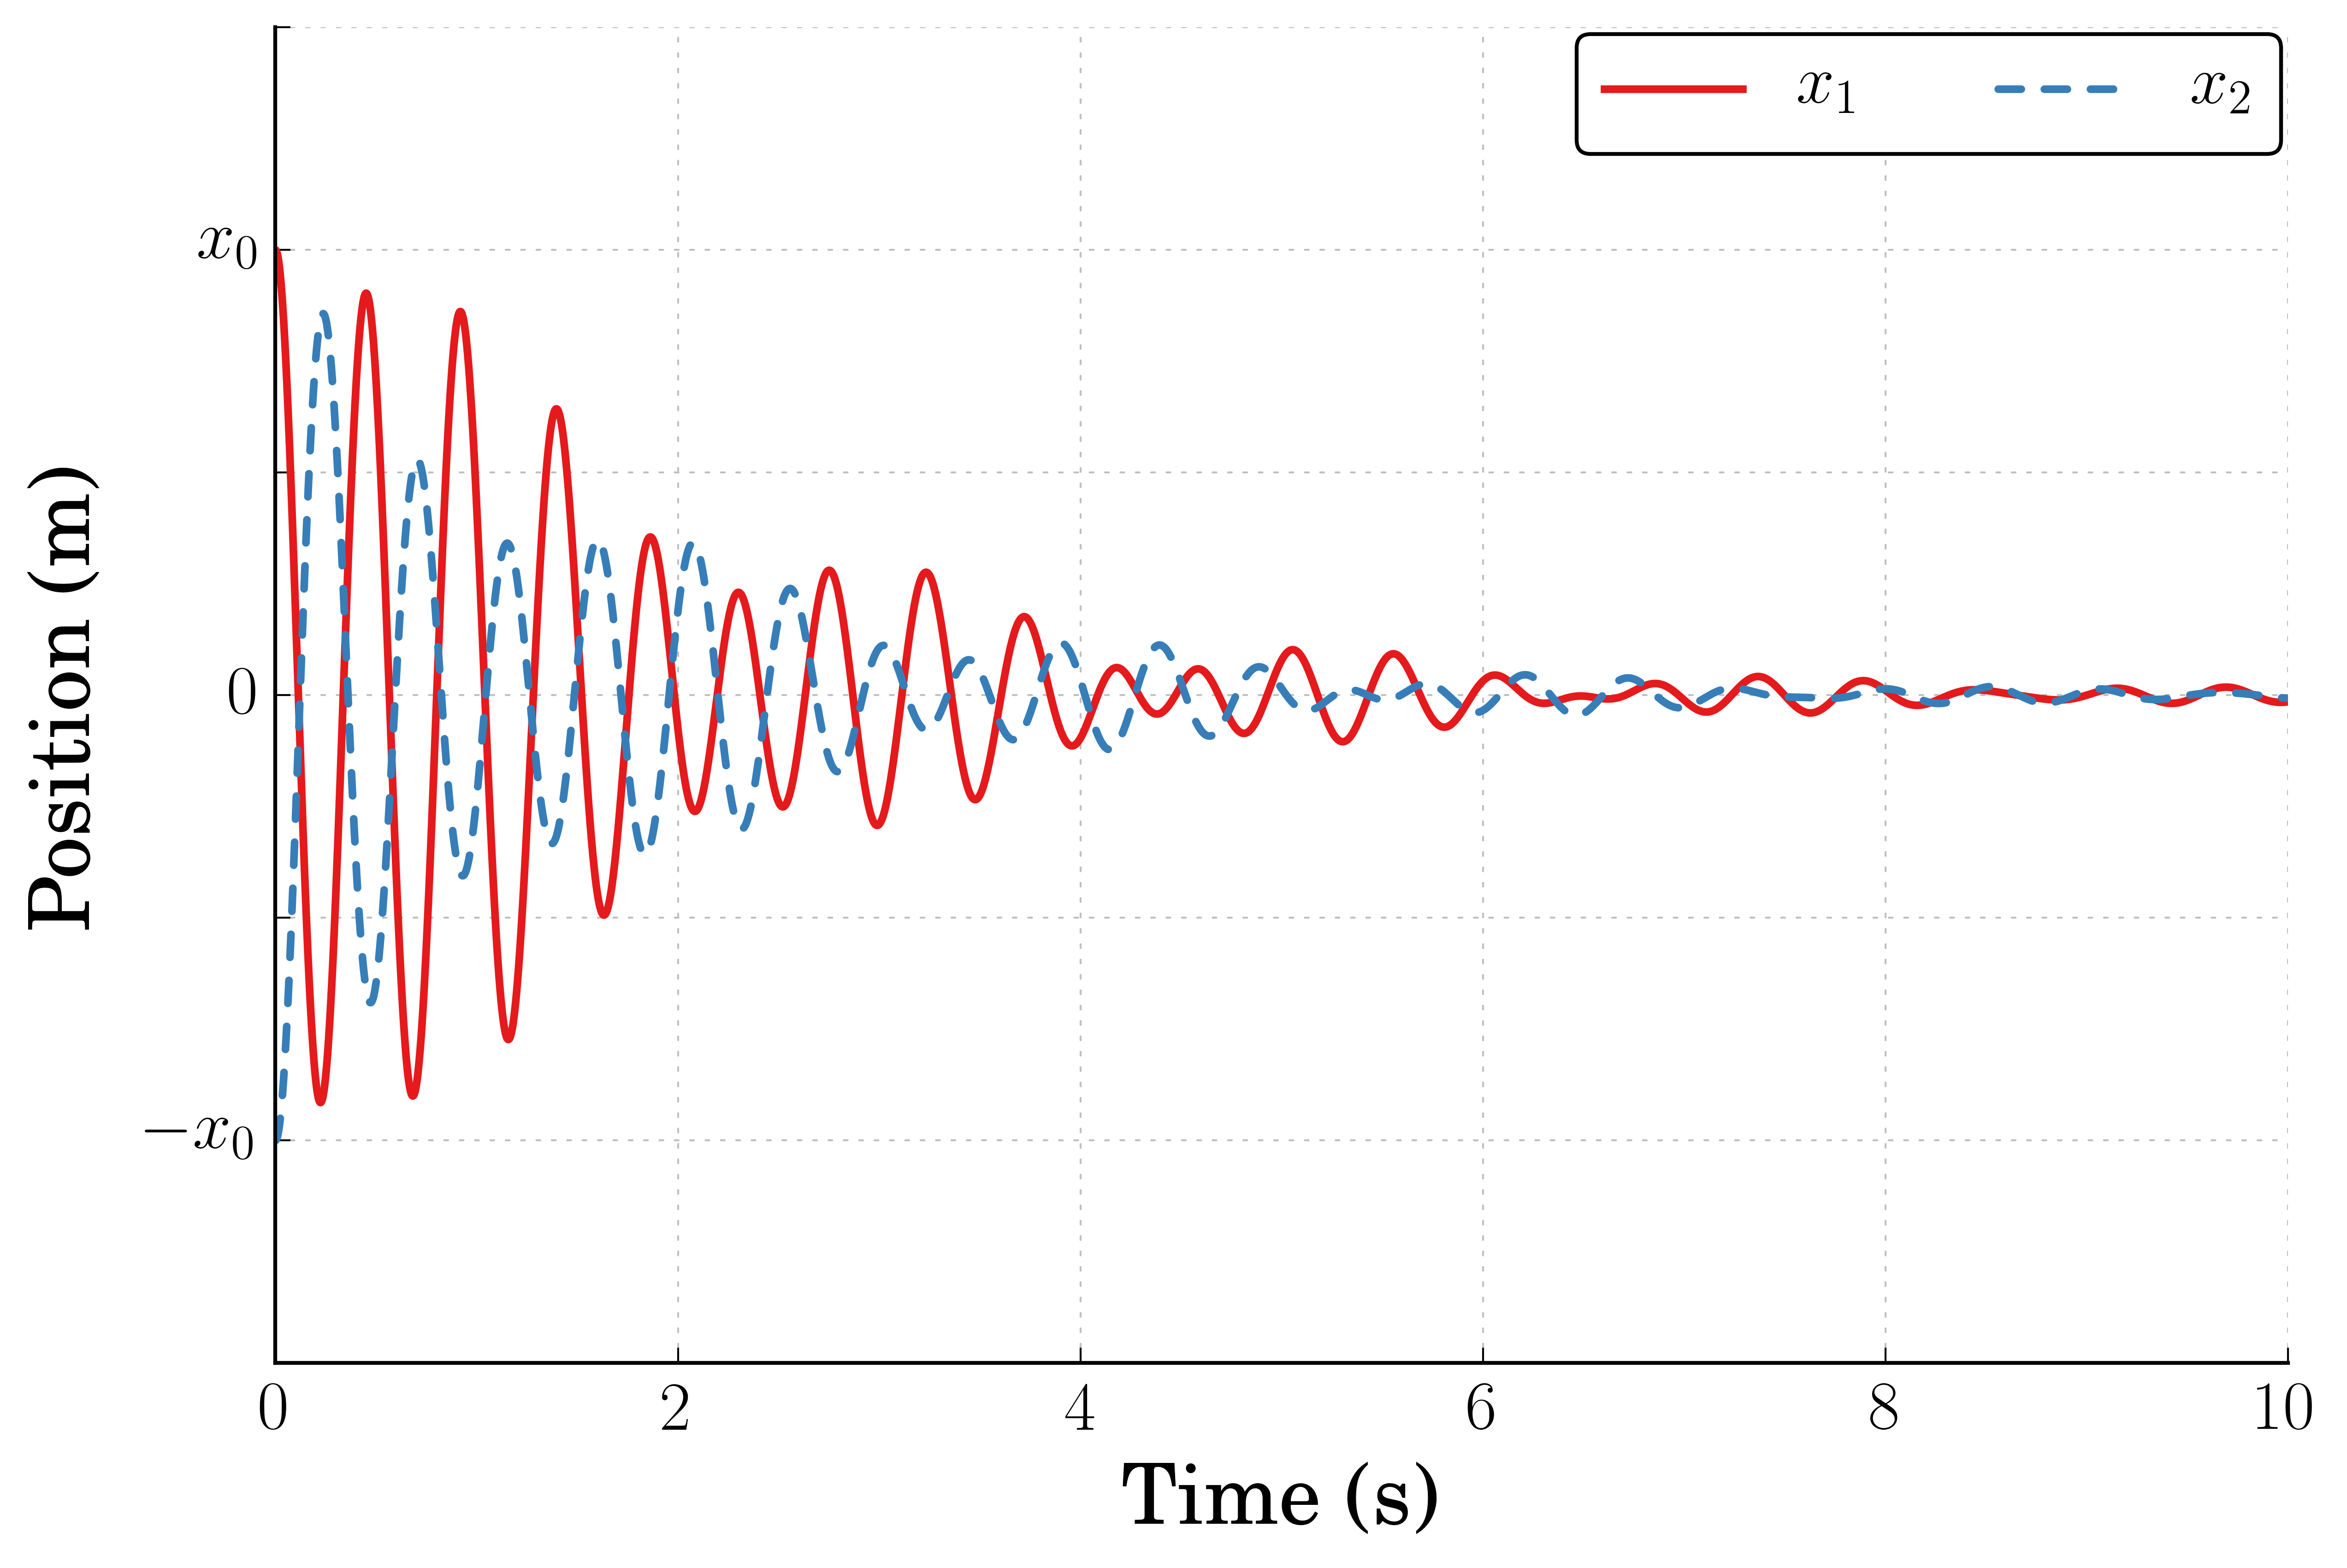

In [18]:
# Now, let's plot the response

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t, x1_decoupled, linewidth=2, linestyle = '-', label=r'$x_1$')
plt.plot(t, x2_decoupled, linewidth=2, linestyle='--', label=r'$x_2$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-0.75,0.75)
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75], ['', '$-x_0$', '', '$0$', '', '$x_0$', ''])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Approx_Decoupled_Resp.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

Now, let's compare the two responses.

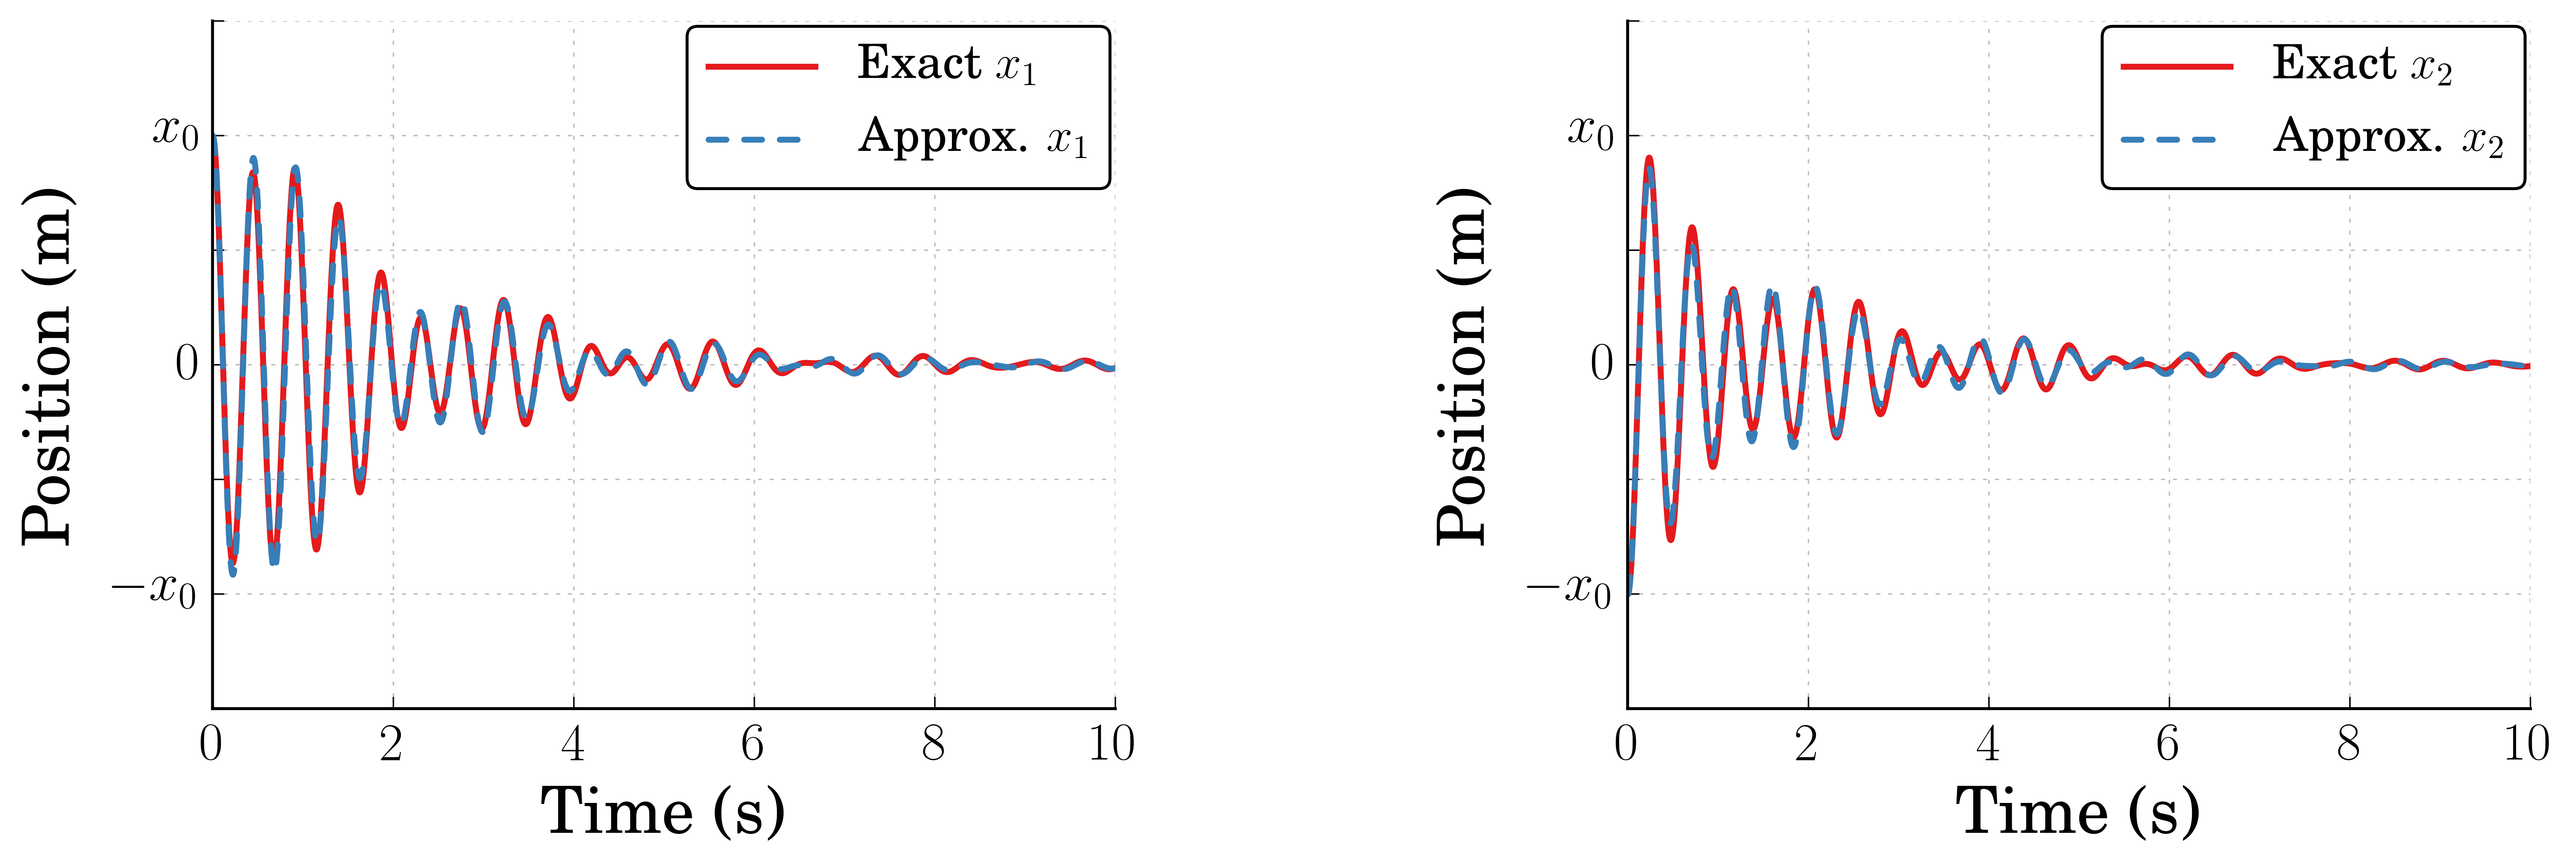

In [19]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

# x1 plot
ax1.set_xlabel('Time (s)', family='serif',fontsize=22,weight='bold',labelpad=5)
ax1.set_ylabel('Position (m)', family='serif',fontsize=22,weight='bold',labelpad=10)
ax1.plot(t, resp[:,0], linewidth=2, linestyle = '-', label=r'Exact $x_1$')
ax1.plot(t, x1_decoupled, linewidth=2, linestyle = '--', label=r'Approx. $x_1$') 
ax1.set_yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75])
ax1.set_yticklabels(['', '$-x_0$', '', '$0$', '', '$x_0$', ''])

ax1.leg = ax1.legend(loc='upper right', fancybox=True)
ltext  = ax1.leg.get_texts()
plt.setp(ltext,family='serif',fontsize=16)

# x2_plot
ax2.set_xlabel('Time (s)', family='serif',fontsize=22,weight='bold',labelpad=5)
ax2.set_ylabel('Position (m)', family='serif',fontsize=22,weight='bold',labelpad=10)
ax2.plot(t, resp[:,2], linewidth=2, linestyle = '-', label=r'Exact $x_2$')
ax2.plot(t, x2_decoupled, linewidth=2, linestyle = '--', label=r'Approx. $x_2$')
# ax2.set_ylim(-0.75, 0.75)
ax2.set_yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75])
ax2.set_yticklabels(['', '$-x_0$', '', '$0$', '', '$x_0$', ''])

ax2.leg = ax2.legend(loc='upper right', fancybox=True)
ltext  = ax2.leg.get_texts()
plt.setp(ltext,family='serif', fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5, w_pad=10)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('Comparison_of_Exact_and_Decoupled_Resps.pdf', dpi = 600)

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [20]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())